# SyriaTel Customer Churn Project

Name: Henry Kemboi

## 1. Project Overview

Syriatel, a telecommunications company, aims to minimize revenue losses caused by customer churn. The company is focused on identifying the key factors contributing to customer attrition and understanding the reasons behind customers discontinuing their services.

### 1.1. Problem Statement

The main task of this project is to identify the factors driving customer churn and develop actionable strategies to reduce it. This will help the company to take appropriate actions on time to avoid losing customers and thus revenue at the same time.


### 1.2. Objectives

* Develop a predictive model to identify customers at risk of churning and any characteristics that are indicative of churn.
* Focus retention efforts on the most at-risk segments to maximize return on investment in customer satisfaction programs.
* Explore patterns and behaviors and use the insights to implement targeted interventions, such as proactive customer support or offering better plans for high usage customers.

## 2. Data Understanding

### 2.1 Setup

To begin, we will import all the relevant libraries necessary for data analysis.

* Pandas - Enables us to manipulate imported datasets saved as dataframes.
* Numpy - Enables us to compute mathematical functions as well as perform array operations.
* Seaborn - Enables us to visualise the data.
* Matplotlib - Additional library to assist in visualising the data.
* Scipy.stats - Assists in performing statistical calculations.


In [1]:
# importing relevant libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3
import statsmodels.api as sm


%matplotlib inline

### 2.2. Loading Data

Use pandas to read in the data from this CSV file and create a dataframe named churn_df and check the first 5 rows of the data frame to get an understanding of the data. 

In [2]:
churn_df = pd.read_csv("./data/syriatel.csv")
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


As part of this step we observe the dimensions as well.

In [3]:
# Check the shape of the dataframe
churn_df.shape

(3333, 21)

### 2.3. Data Analysis

#### 2.3.1 Data Cleaning

At this point we want to check for any missing values or null values in the dataset.

##### 2.3.1.1 Checking for missing values

In [4]:
#Checking for missing values
churn_df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

##### 2.3.1.2 Check for any duplicate values

In [5]:
# Checking for duplicates and dropping them
churn_df.drop_duplicates(inplace=True)
churn_df.shape


(3333, 21)

##### 2.3.1.3 Handle Categorical values

Encode categorical variables using one-hot encoding

In [6]:
# One-hot encoding for categorical columns
#data_encoded = churn_df.get_dummies(data, drop_first=True)
#data_encoded

#### 2.3.2 Exploratory Data Analysis (EDA)

We now do EDA to to understand the structure, relationships, and key insights of the data.

In [7]:
# Overview of the dataset
churn_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Check for correlations between numerical features to understand their relationships.


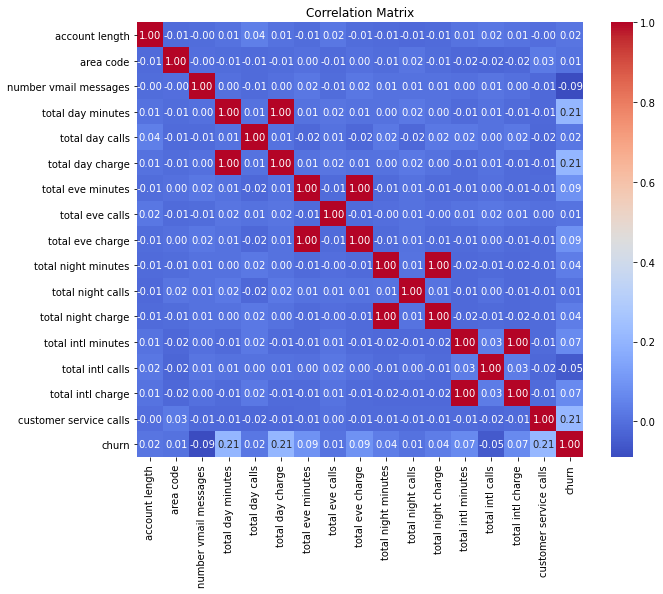

In [8]:
# Compute correlation matrix
correlation_matrix = churn_df.corr()

# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Histogram for distributions of numeric variables:

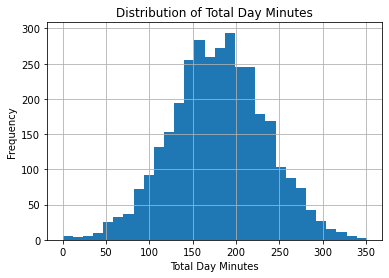

In [9]:
churn_df['total day minutes'].hist(bins=30)
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()


Boxplot to identify outliers:

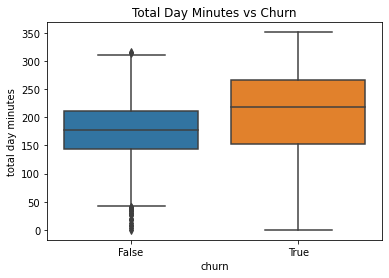

In [10]:
sns.boxplot(x='churn', y='total day minutes', data=churn_df)
plt.title('Total Day Minutes vs Churn')
plt.show()


Countplot for categorical variables (e.g., churn):

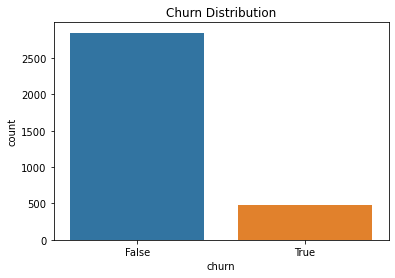

In [11]:
sns.countplot(x='churn', data=churn_df)
plt.title('Churn Distribution')
plt.show()

Pairplot for pairwise relationships between variables:

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


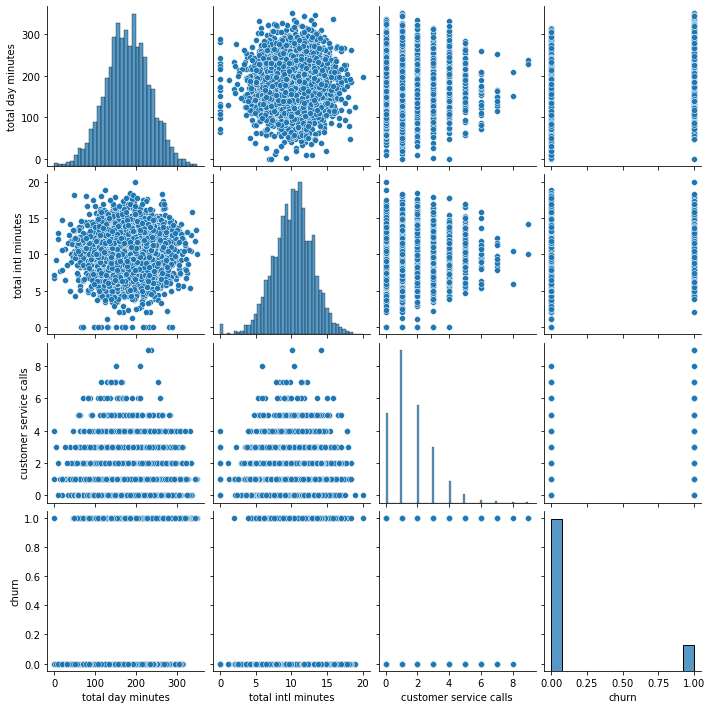

In [12]:
sns.pairplot(churn_df[['total day minutes', 'total intl minutes', 'customer service calls', 'churn']])
plt.show()

## 3. Modeling

At this point, we want to develop a predictive model to identify customers at risk of churning. 

#### 3.1 Logistic Regression Model

It is a stepwise process starting with data preparation/preprocessing.

* Target Variable: churn (binary: True for churned customers, False otherwise).
* Features: Use relevant columns such as: 
    * Customer metrics (e.g., total day minutes, total intl calls, customer service calls).
    * Categorical features (e.g., international plan, voice mail plan).
* Encoding: Convert categorical variables into numerical form using one-hot encoding.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Increasing the number of iterations to suppress output warnings
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Load dataset
data = churn_df

# Step 1: Preprocess the data
# Convert target to numeric
data['churn_numeric'] = data['churn'].astype(int)

# Drop irrelevant columns
X = data.drop(columns=['churn', 'churn_numeric', 'phone number', 'state'])  # Adjust as needed
y = data['churn_numeric']

# One-hot encode categorical variables (like 'international plan', 'voice mail plan')
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X[['account length', 'total day minutes', 'total day charge', 'total eve minutes', 
   'total eve charge', 'total night minutes', 'total night charge', 'total intl minutes',
   'total intl charge', 'customer service calls']] = scaler.fit_transform(
       X[['account length', 'total day minutes', 'total day charge', 'total eve minutes', 
           'total eve charge', 'total night minutes', 'total night charge', 'total intl minutes',
           'total intl charge', 'customer service calls']]
   )

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Step 4: Evaluate the model
# Predict probabilities for ROC-AUC
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Predict labels
y_pred = log_reg.predict(X_test)

# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nROC-AUC Score:", roc_auc)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.56      0.09      0.15       101

    accuracy                           0.85       667
   macro avg       0.71      0.54      0.54       667
weighted avg       0.81      0.85      0.80       667


Confusion Matrix:
[[559   7]
 [ 92   9]]

ROC-AUC Score: 0.8013329601511388


C:\Users\Lilan\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3.2 Decision Tree Algorithm

The goal here is to train a Decision Tree without hyperparameter tuning and visualize the tree structure.

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.74      0.72      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667


Confusion Matrix:
[[540  26]
 [ 28  73]]

ROC-AUC Score: 0.8384179407340027


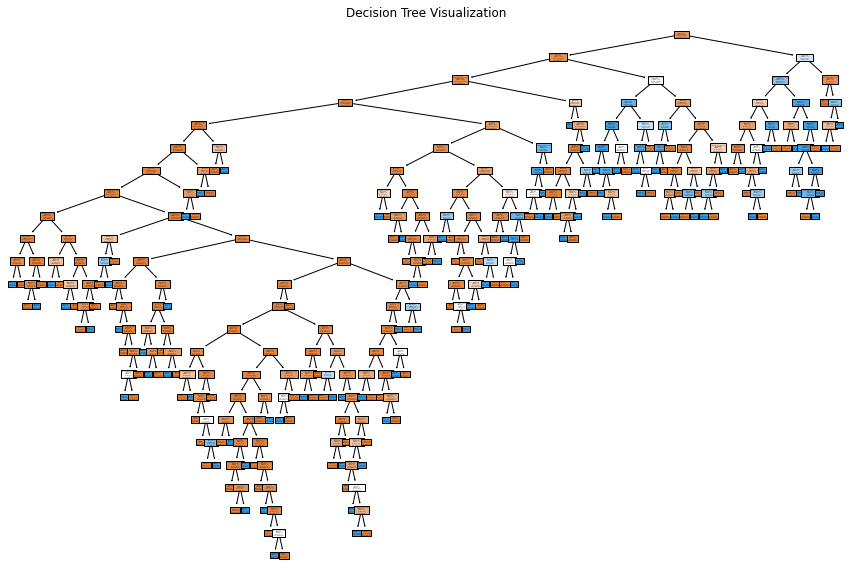

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import tree

# Step 1: Train the Decision Tree Model
#dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 2: Predict on the Test Set
y_pred = dt_classifier.predict(X_test)
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Step 3: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Step 4: Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Churn', 'Churn'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


Next, we perform hyperparameter tuning by setting the max_depth of the tree to 5 to optimize the model. This will significantly improve the accuracy of the decision tree.

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.89      0.67      0.77       101

    accuracy                           0.94       667
   macro avg       0.92      0.83      0.87       667
weighted avg       0.94      0.94      0.93       667


Confusion Matrix:
[[558   8]
 [ 33  68]]

ROC-AUC Score: 0.8892436063394324


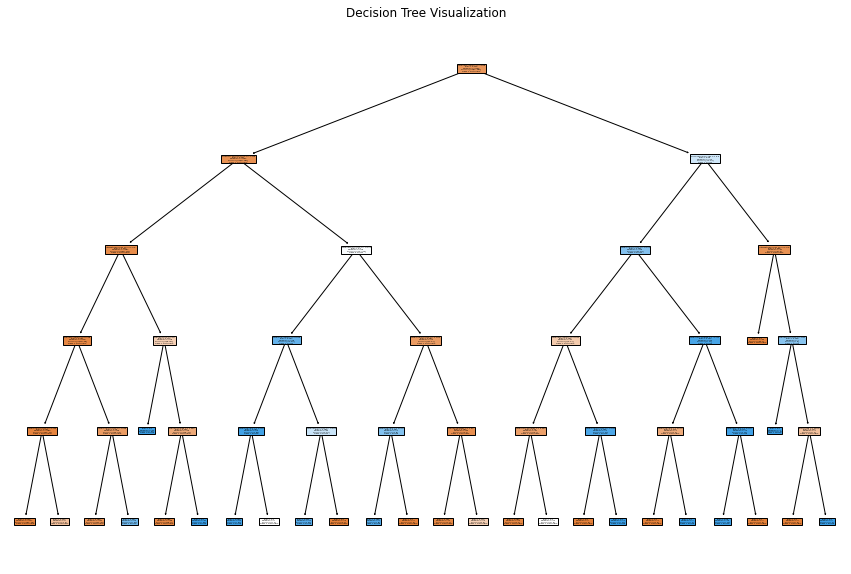

In [41]:
# Step 1: Train the Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

# Step 2: Predict on the Test Set
y_pred = dt_classifier.predict(X_test)
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Step 3: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Step 4: Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Churn', 'Churn'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()